In [66]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

### Dataset taken from https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci
#### It has already been cleaned and pre-processed to remove null values etc

In [83]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## PARAMETERS IN THE TABLE

1) age: age in years
2) sex: sex (1 = male; 0 = female)
3) cp: chest pain type
    * Value 0: typical angina
    * Value 1: atypical angina
    * Value 2: non-anginal pain
    * Value 3: asymptomatic
4) trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5) chol: serum cholestoral in mg/dl
6) fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7) restecg: resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8) thalach: maximum heart rate achieved
9) exang: exercise induced angina (1 = yes; 0 = no)
10) oldpeak = ST depression induced by exercise relative to rest
11) slope: the slope of the peak exercise ST segment
    * Value 0: upsloping
    * Value 1: flat
    * Value 2: downsloping
12) ca: number of major vessels (0-3) colored by flourosopy
13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14) condition: 0 = no disease, 1 = disease

In [84]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [85]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [86]:
df.shape

(1025, 14)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [88]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [89]:
duplicate=df.duplicated().any()
duplicate

True

In [74]:
df=df.drop_duplicates()
df.shape

(302, 14)

<AxesSubplot: >

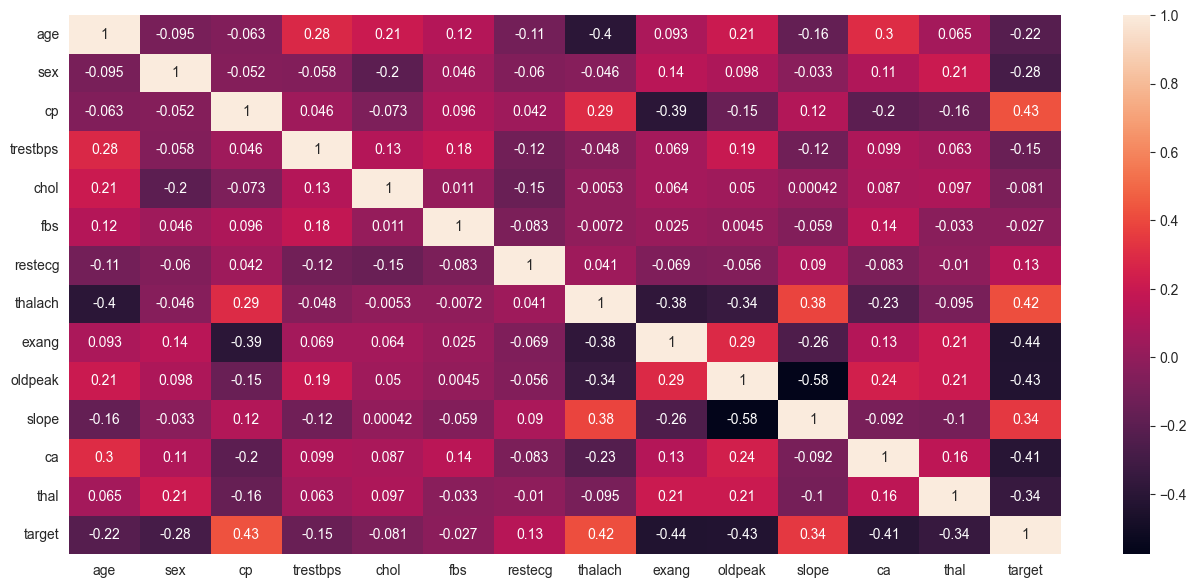

In [75]:
plt.figure(figsize=(16,7))
sns.heatmap(df.corr(), annot=True)

In [76]:
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

<AxesSubplot: xlabel='target', ylabel='count'>

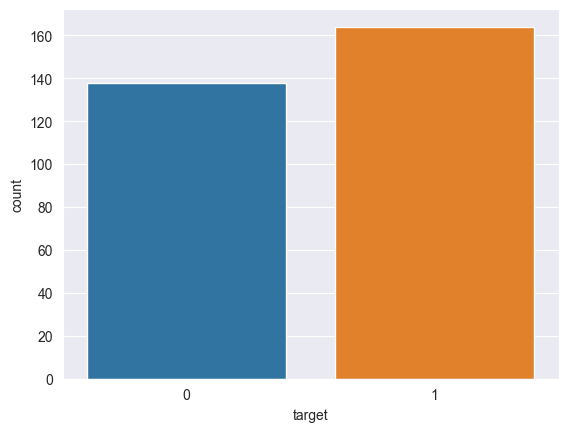

In [77]:
sns.countplot(df,x=df['target'])

In [78]:
df['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

<AxesSubplot: xlabel='sex', ylabel='count'>

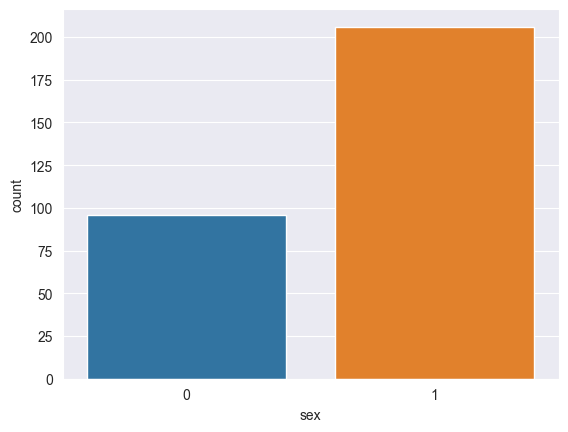

In [79]:
sns.countplot(df,x=df['sex'])

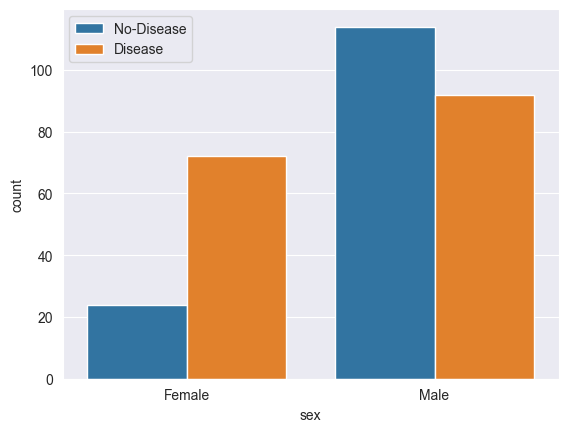

In [80]:
sns.countplot(x='sex',hue='target',data=df)
plt.xticks([1,0],['Male','Female'])
plt.legend(labels=['No-Disease','Disease'])
plt.show()

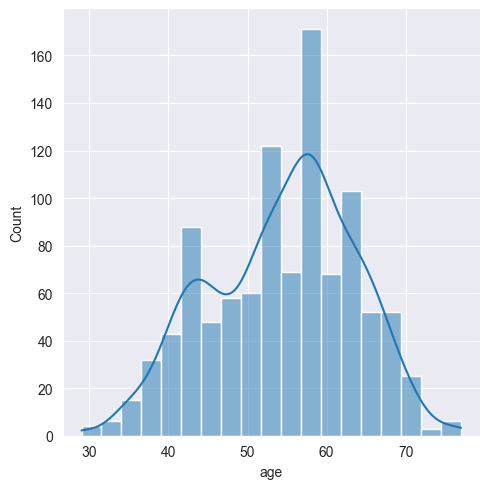

In [92]:
sns.displot(df['age'], kde=True)

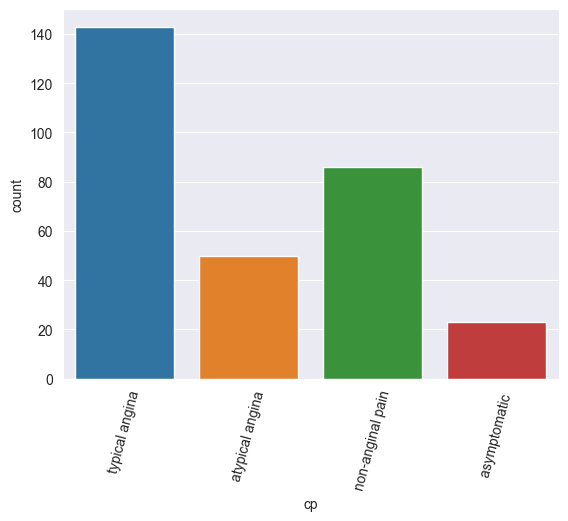

In [58]:
sns.countplot(df, x=df['cp'])
plt.xticks([0,1,2,3],["typical angina","atypical angina","non-anginal pain","asymptomatic "])
plt.xticks(rotation=75)
plt.show()

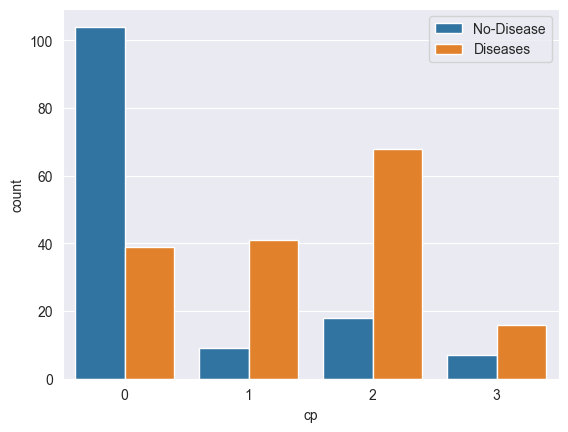

In [60]:
sns.countplot(x='cp',hue='target',data=df)
plt.legend(labels=['No-Disease','Diseases'])
plt.show()


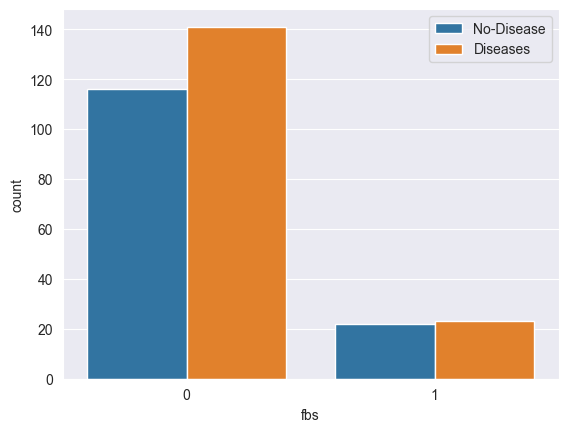

In [62]:
sns.countplot(x='fbs',hue='target',data=df)
plt.legend(labels=['No-Disease','Diseases'])
plt.show()

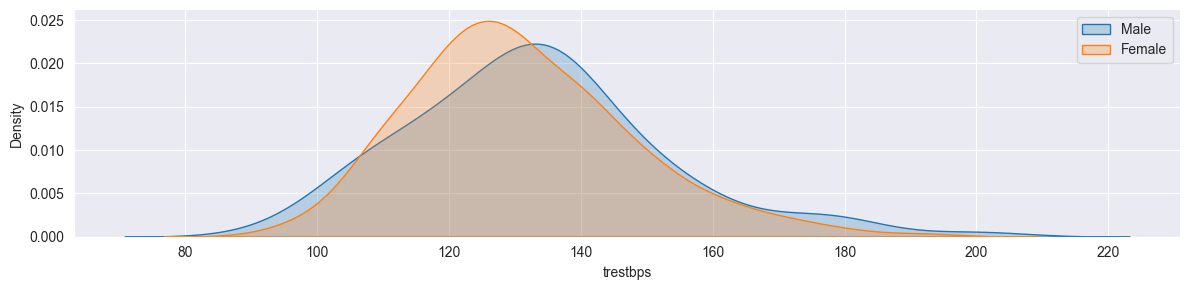

In [65]:
g = sns.FacetGrid(df,hue='sex',aspect=4)
g.map(sns.kdeplot,'trestbps',fill=True)
plt.legend(labels=['Male','Female'])

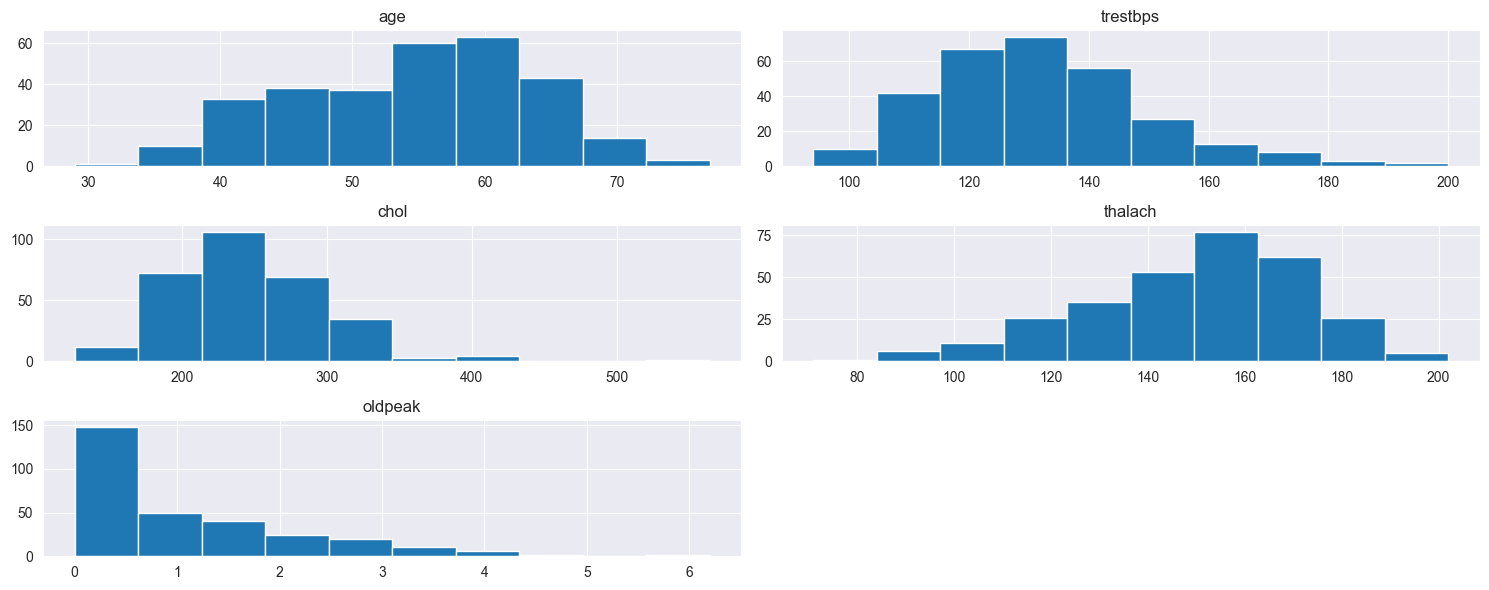

In [82]:
cate_val = []
cont_val = []
for column in df.columns:
    if len(df[column].unique())<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)
df.hist(cont_val,figsize=(15,6))
plt.tight_layout()
plt.show()